# Run regrid operation

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki

**parameters of regrid operation**

In [2]:
rooki.regrid?

Signature: rooki.regrid(collection, method='nearest_s2d', grid='auto')
Docstring:
Run regridding operator on climate model data using daops (xarray).

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiers. Example: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
method : {'nearest_s2d', 'bilinear', 'conservative', 'patch'}string
    Please specify regridding method like consevative or bilinear. Default: nearest_s2d
grid : {'auto', '0pt25deg', '0pt25deg_era5', '0pt5deg_lsm', '0pt625x0pt5deg', '0pt75deg', '1deg', '1pt25deg', '2pt5deg'}string
    Please specify output grid resolution for regridding. Default: auto

Returns
-------
output : ComplexData:mimetype:`application/metalink+xml; version=4.0`
    Metalink v4 document with references to NetCDF files.
prov : ComplexData:mimetype:`application/json`
    Provenance document using W3C standard.
prov_plot : ComplexData:mimetype:`image/png`
    Provenance docume

## workflow: subset + regrid


In [3]:
from rooki import operators as ops

In [4]:
rlds = ops.Input(
    'rlds', ['c3s-cmip6.ScenarioMIP.INM.INM-CM5-0.ssp245.r1i1p1f1.Amon.rlds.gr1.v20190619']
)

wf = ops.Subset(rlds, time="2016/2016")

wf = ops.Regrid(wf, method="nearest_s2d", grid="1deg")

In [5]:
resp = wf.orchestrate()
resp.ok 

True

In [6]:
resp.status

'ProcessSucceeded'

In [7]:
ds = resp.datasets()[0]
ds

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, bnds: 2, time: 12)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
  * time       (time) object 2016-01-16 12:00:00 ... 2016-12-16 12:00:00
    time_bnds  (time, bnds) object ...
Dimensions without coordinates: bnds
Data variables:
    rlds       (time, lat, lon) float32 ...
Attributes: (12/52)
    Conventions:                  CF-1.7 CMIP-6.2
    activity_id:                  ScenarioMIP
    branch_method:                standard
    branch_time_in_child:         60225.0
    branch_time_in_parent:        60225.0
    contact:                      Evgeny Volodin (volodinev@gmail.com)
    ...                           ...
    grid_original:                gs2x1.5
    grid_label_original:          gr1
    nominal_resolution_original:  100 km
    regrid_operation:             nearest_s2d_120x180_180x360_peri
    regrid_tool:                  xESMF_v0.8.2
    regrid_weights_uid:           046d352045d899caf55bd49408cff1e6_d24f4f689f...

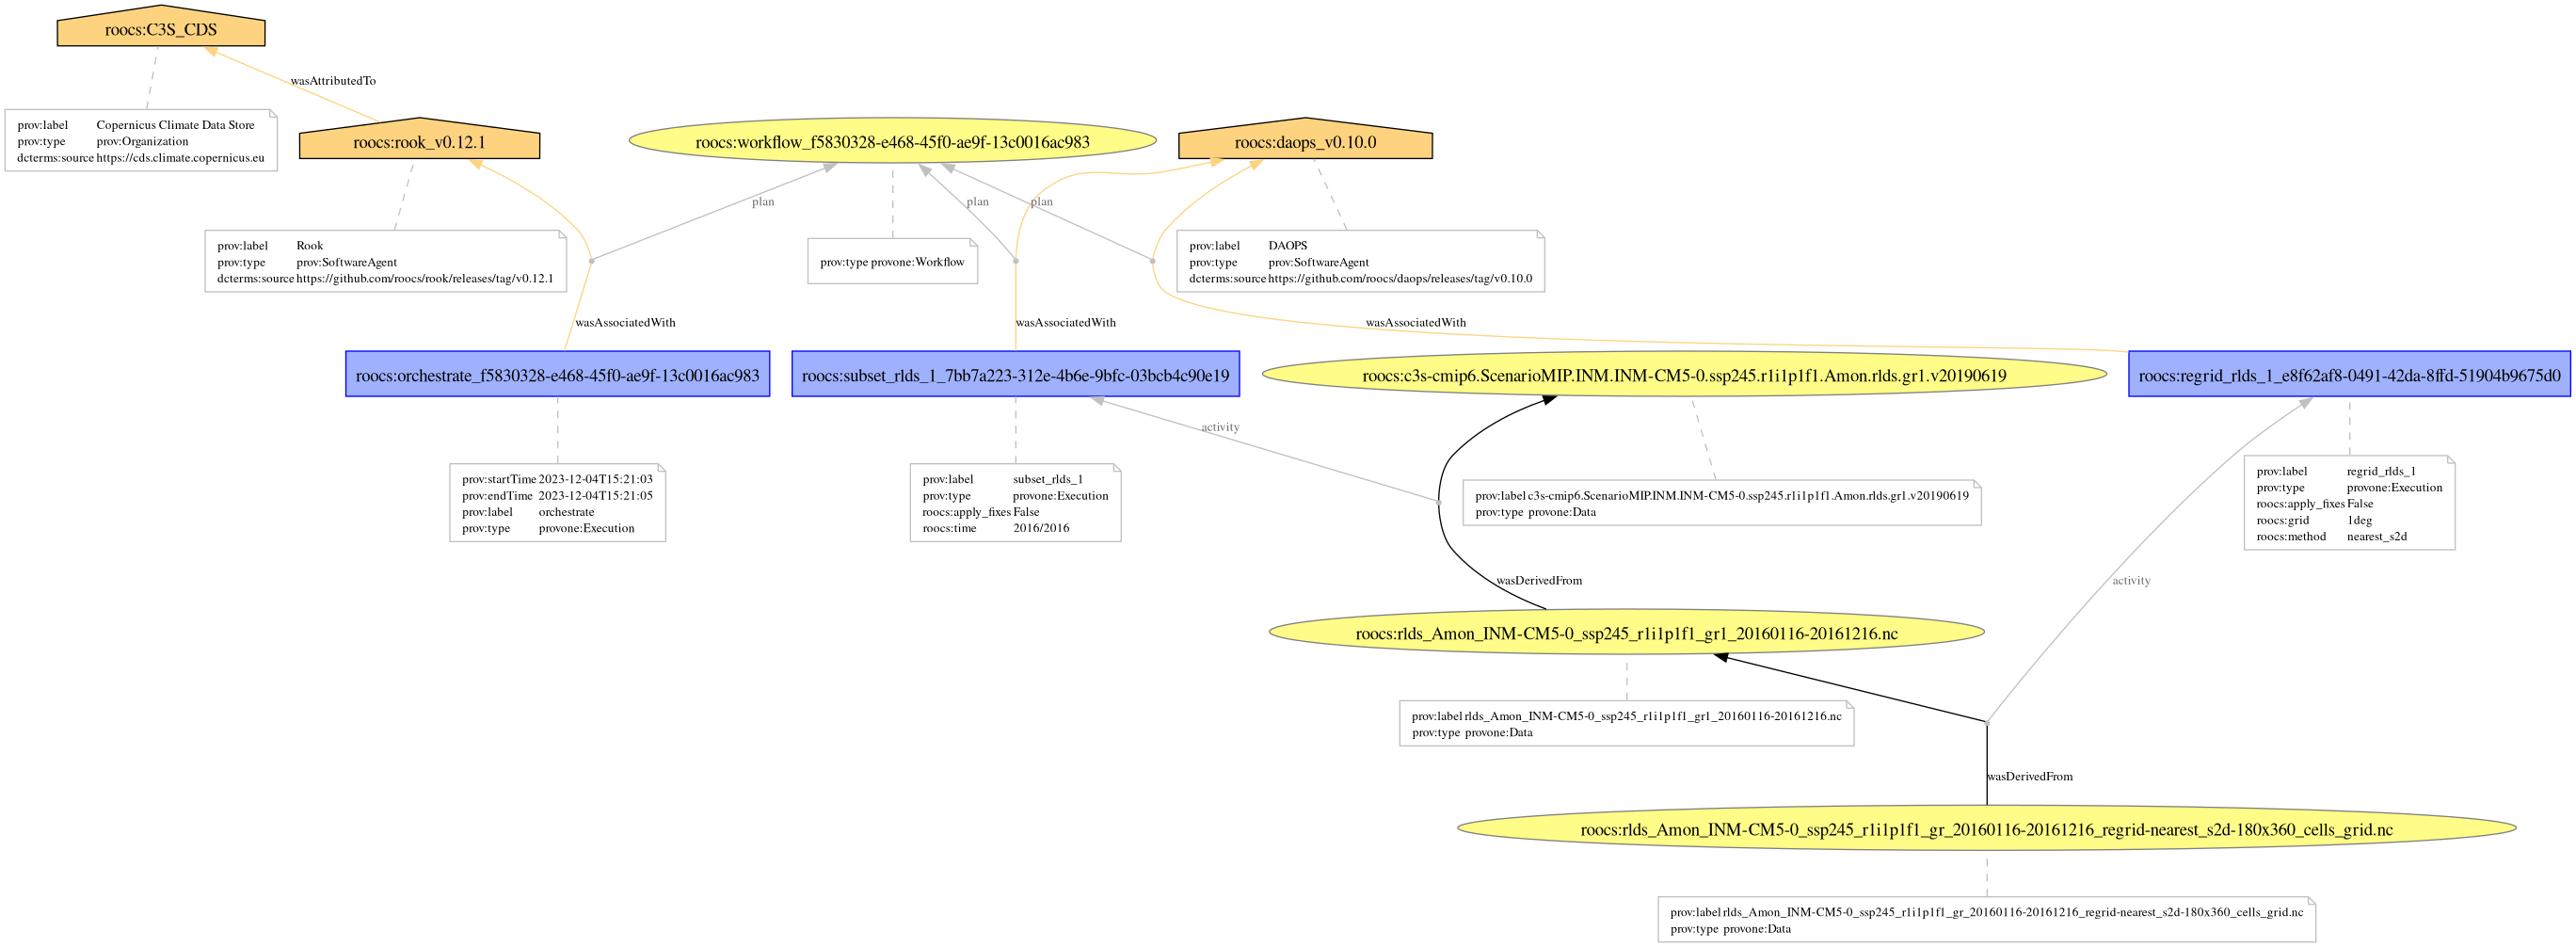

In [8]:
from IPython.display import Image
Image(resp.provenance_image())